# Matplolib可视化参考案例

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# dictionary of the feature names
feature_dict = {i:label for i,label in zip(
            range(4),
              ('sepal length in cm', 
              'sepal width in cm', 
              'petal length in cm', 
              'petal width in cm', ))}
# reading the CSV file directly from the UCI machine learning repository
df=pd.read_csv("iris.csv",header=None,sep=',')

df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

# convert pandas DataFrame to simple numpy arrays
X = df.iloc[:,:4].values 
#X = df[[0,1,2,3]].values 
y = df['class label'].values
# convert class labels from strings to integers
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)

label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

attr_dict = {0: 'sepal length', 
            1:  'sepal width', 
            2:  'petal length', 
            3:  'petal width'}

In [4]:
X.shape
y.shape

(150,)

## Pie chart

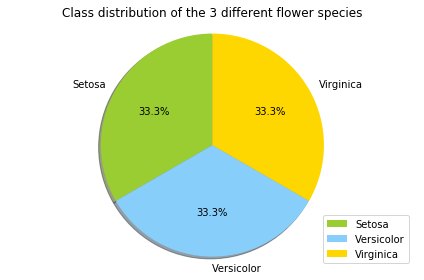

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.pie(
    [X[y == i].shape[0] for i in range(3)],
    labels = [label_dict[i] for i in range(3)],
    shadow = True,
    colors = ('yellowgreen','lightskyblue','gold'),
    startangle = 90,   #rotate conter-clockwise by 90 degrees
    autopct = '%1.1f%%', #display fraction as percentalge
)
plt.legend(fancybox = True,loc = 'lower right')
plt.title('Class distribution of the 3 different flower species')
plt.axis('equal') #plot pyplot as circle
plt.tight_layout()
plt.show()

## Bar plot

In [6]:
#x = X[1:]


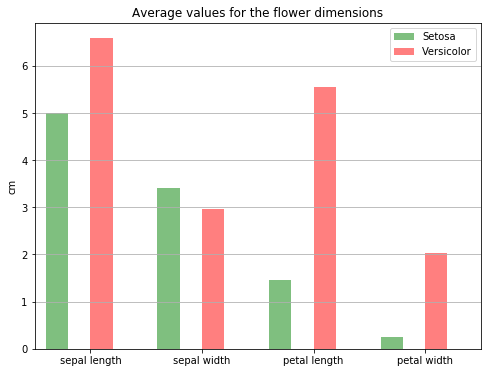

In [7]:
mean_vals = [X[y == i,:].mean(axis = 0) for i  in range(3)]
labels = [attr_dict[i] for i in range(4)]

#Setting the positions and width for the bars
pos = np.arange(4)
width = 0.2

#Plotting the bars
fig,ax = plt.subplots(figsize = (8,6))
plt.bar(pos,mean_vals[0],width,alpha = 0.5,color = 'g',label = labels[0])
plt.bar([p + width*2 for p in pos],mean_vals[2],width,
                alpha = 0.5,
                color = 'r',
                label = labels[2])

#Setting axis labels and ticks
ax.set_ylabel('cm')
ax.set_title('Average values for the flower dimensions')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(labels)

#Setting the x-axis and y-axislimits
plt.xlim(min(pos)-width,max(pos)+width*4)

#Adding the legend and showing the plot
plt.legend([label_dict[i] for i in range(3)],loc = 'upper right')

#Adding horizontal grid lines
ax.yaxis.grid(True)
plt.show()

## Box plot

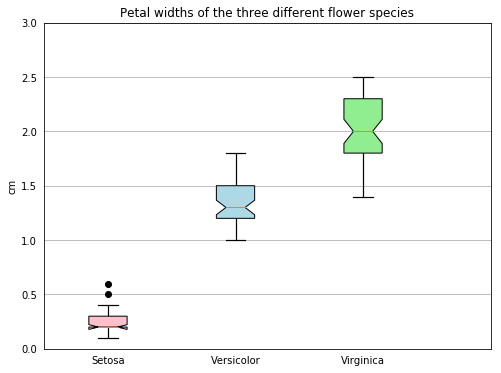

In [8]:
fig = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
bplot = plt.boxplot([X[y == i,3] for i in range(3)],
        notch = True,         # notch shape
        vert = True,          # vertical box aligmnent
        sym = 'ko',           # black circle for outliers
        patch_artist = True)  # fill with color
# choosing custom colors to fill the boxes
colors = ['pink','lightblue','lightgreen']
for patch, color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)

# modifying the whiskers: straight lines,black,wider
for whisker in bplot['whiskers']:
    whisker.set(color = 'black',linewidth = 1.2,linestyle = '-')
    
# making the caps a little bit wider
for cap in bplot['caps']:
    cap.set(linewidth = 1.2)

# hiding axis ticks 
plt.tick_params(axis = 'both',which = 'both',bottom = 'off',top = 'off',
               labelbottom = 'on',left = 'off',right = 'off',labelleft = 'on')

# adding horizontal grid lines
ax.yaxis.grid(True)

plt.xticks([y+1 for y in range(4)],[label_dict[i] for i in range(3)])
plt.ylim([0,3])

plt.title('Petal widths of the three different flower species')
plt.ylabel('cm')
plt.show()

## 1D Histogram

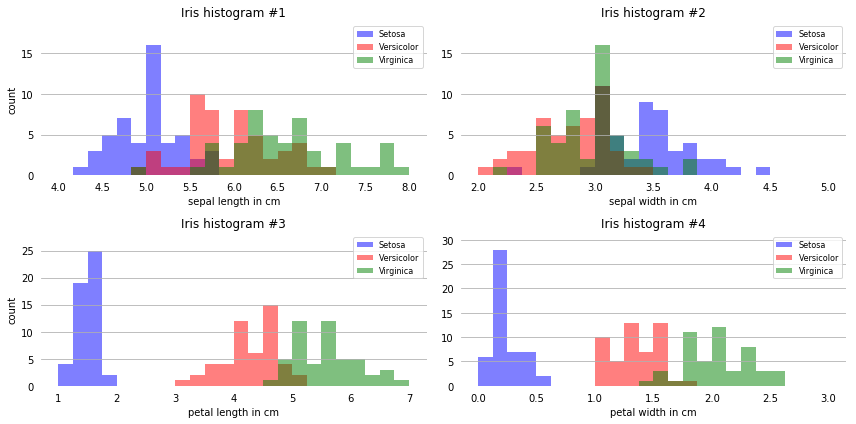

In [9]:
import math
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (12,6))
for ax, cnt in zip(axes.ravel(),range(4)):
    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b,max_b,25)
    # plotting the histograms
    for lab,col in zip(range(3),('blue','red','green')):
        ax.hist(X[y == lab,cnt],
               color = col,
               label ='%s'%label_dict[lab],
               bins = bins,
               alpha = 0.5)
    ylims = ax.get_ylim()
    # plot annotation
    leg = ax.legend(loc = 'upper right',fancybox = True,fontsize = 8)
    ax.set_ylim([0,max(ylims) + 2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt + 1 ))
    # adding horizontal grid lines
    ax.yaxis.grid(True)
    # hide axis ticks
    ax.tick_params(axis = 'both',which = 'both',bottom = 'off',top = 'off',
            labelbottom = 'on',left = 'off',right = 'off',labelleft = 'on')
    # remove axis spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')
fig.tight_layout()
plt.show()

## 2D Histogram

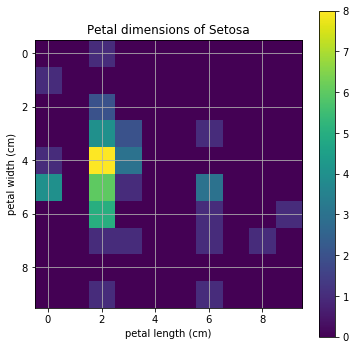

In [10]:
fig = plt.figure(figsize = (6,6))
hist,xedges,yedges = np.histogram2d(X[y == 0,2],X[y == 0,3])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal dimensions of Setosa')
plt.imshow(hist)
plt.grid(True)
plt.colorbar()
plt.show()

## 3D Histogram

In [12]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(figsize = (8,6))
#ax = fig.add_subplot(111,projection = '3d')
#x1, y1 = np.copy(X[:2]),np.copy(X[:,3])
#hist, xedges, yedges = np.histogram2d(x1,y1,bins = 4)
#elements = (len(xedges) - 1) * (len(yedges) - 1)
#xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
#xpos = xpos.flatten()
#ypos = ypos.flatten()
#zpos = np.zeros(elements)
#dx = 0.5 * np.ones_like(zpos)
#dy = dx.copy()
#dz = hist.flatten()
#ax.set_xlabel('petal length (cm)')
#ax.set_ylabel('petal width (cm)')
#ax.seet_zlabel('count')
#plt.title('Petal length and width distributions for all samples')
#ax.bar3d(xpos,ypos,zpos,dx,dy,dz,color ='b',zsort = 'average')
#plt.show()

## Scatter plot

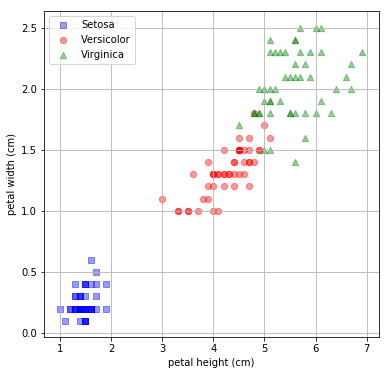

In [15]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
colors = ['blue','red','green']
markers = ['s','o','^']
for lab,c,m in zip(range(3),colors,markers):
    ax.scatter(X[y == lab,2],X[y == lab,3],
              c = c,        # color
              marker = m,   # marker symbol
              s = 40,       # markersize
              alpha = 0.4,  # transparency
              label =label_dict[lab]
              )
ax.set_xlabel('petal height (cm)')
ax.set_ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()